<a href="https://colab.research.google.com/github/chanyoung1998/LearningML-DL/blob/main/k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##k-최근접 이웃 회귀 알고리즘



###데이터 준비



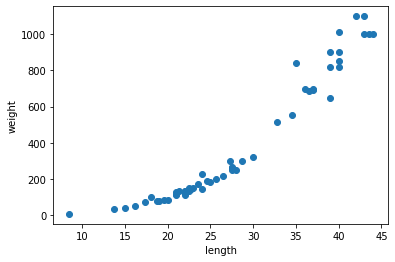

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show

train_input, test_input , train_target, test_target = train_test_split(perch_length,perch_weight,random_state =  42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


###결정 계수(R^2)





In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error

knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
print('테스트 세트에 대한 정확도 : {}'.format(knr.score(test_input,test_target)))

#테스트 세트에 대한 예측을 만든다
test_production = knr.predict(test_input)
#테스트 세트에 대한 평균 절대값 오차를 계산
mae = mean_absolute_error(test_target,test_production)
print('{}g 정도 예측이 평균과 다르다'.format(mae))

#이번에는 평소와는 다르게 train 세트를 가지고 score()메서드를 사용해보자
print('훈련 세트에 대한 정확도 : {}'.format(knr.score(train_input,train_target)))
#결과는 오히려 train 세트에서 더 오차가 커진다. 과소 적합이 발생한다
#모델이 너무 단순하기 때문이다. 복잡하게 만들어 보자 (123p)

knr.n_neighbors = 3
knr.fit(train_input,train_target)
print('복잡하게 학습한 모델에서 테스트세트에 대한 정확도 : {}'.format(knr.score(test_input,test_target)))
print('복잡하게 학습한 모델에서 훈련세트에 대한 정확도 : {}'.format(knr.score(train_input,train_target)))


테스트 세트에 대한 정확도 : 0.9928094061010639
19.157142857142862g 정도 예측이 평균과 다르다
훈련 세트에 대한 정확도 : 0.9698823289099255
복잡하게 학습한 모델에서 테스트세트에 대한 정확도 : 0.974645996398761
복잡하게 학습한 모델에서 훈련세트에 대한 정확도 : 0.9804899950518966


#### 확인 문제

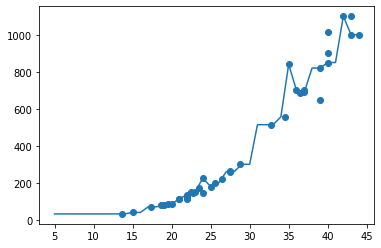

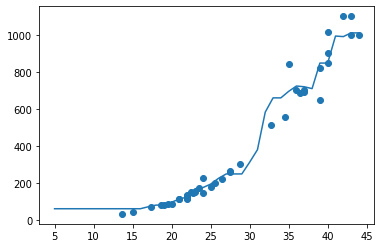

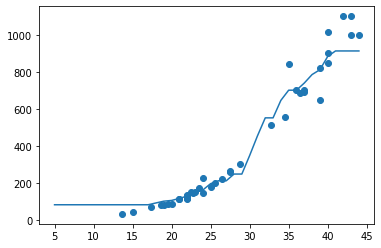

In [6]:
#확인 문제 과대 적합 및 과소 적합 확인해 보기

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input , train_target, test_target = train_test_split(perch_length,perch_weight,random_state =  42)
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)


knr = KNeighborsRegressor()
x = np.arange(5,45).reshape(-1,1)

#n이 커짐에 따라 단순해 진다.(일반적인 패턴을 따르게 된다)
for n in [1,5,10]:
  knr.n_neighbors = n
  knr.fit(train_input,train_target)
  prediction = knr.predict(x)

  plt.scatter(train_input,train_target)
  plt.plot(x, prediction)
  plt.show()


# 선형 회귀


##k-최근접 이웃의 한계


[1033.33333333]


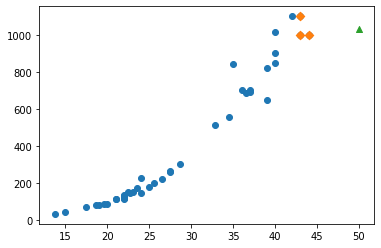

In [17]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

train_input, test_input, train_target, test_target = train_test_split(perch_length,perch_weight,random_state = 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

knr = KNeighborsRegressor(n_neighbors= 3)
knr.fit(train_input,train_target)
print(knr.predict([[50]]))

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexes],train_target[indexes],marker = 'D')

plt.scatter(50,1033,marker = '^')
plt.show()

#한계: 훈련세트의 범위를 벗어난 샘플이라면 엉뚱한 값을 예측한다.

##선형 회귀 모델

[1241.83860323]
기울기:[39.01714496] y절편:-709.0186449535477


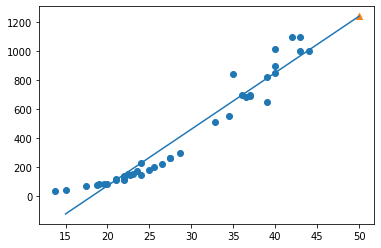

훈련 세트: 0.9398463339976039
테스트 세트: 0.8247503123313558


In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))
print('기울기:{} y절편:{}'.format(lr.coef_,lr.intercept_))

plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_ ])
plt.scatter(50,1241.8,marker = '^')
plt.show()
print('훈련 세트:',lr.score(train_input,train_target))
print('테스트 세트:',lr.score(test_input,test_target))

###다항 회귀


[1573.98423528]
[  1.01433211 -21.55792498] 116.05021078278276


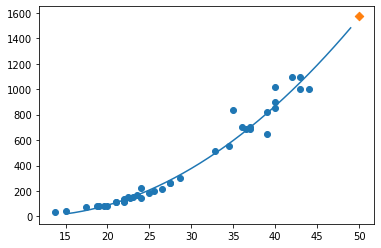

0.9706807451768623
0.9775935108325122


In [33]:
train_poly = np.column_stack((train_input ** 2,train_input))
test_poly = np.column_stack((test_input ** 2 , test_input))
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)

point = np.arange(15,50)

plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2 -21.6*point+116.05)
plt.scatter([50],[1574],marker='D')
plt.show()

print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))